In [165]:
import random
import numpy as np
import pandas as pd
from valuate import valuate

In [166]:
def normalize_theta(theta):
    # Chuẩn hóa sao cho tổng bằng 1
    return theta / np.sum(theta)

In [167]:
def transform_x52(value):
    return -value

In [168]:
df = pd.read_csv('../export.csv')
df['x52'] = df['x52'].apply(transform_x52)

filtered_df = df[df['label'] == 1]
X = filtered_df[['x11', 'x12', 'x21', 'x22', 'x23', 'x24', 'x31', 'x32', 'x41', 'x42', 'x43', 'x51', 'x52', 'x61', 'x71', 'x72']].values
y = filtered_df['label'].values 

In [169]:
filtered_df = df[df['label'] == 2]
X2 = filtered_df[['x11', 'x12', 'x21', 'x22', 'x23', 'x24', 'x31', 'x32', 'x41', 'x42', 'x43', 'x51', 'x52', 'x61', 'x71', 'x72']].values

In [170]:
def foo(theta):
    return np.dot(X, theta)
def foo2(theta):
    return np.dot(X2, theta)
    
def fitness(theta):
    normalized_theta = normalize_theta(theta)
    accuracy_list = valuate(normalized_theta)
    accuracy_list = np.array(accuracy_list)
    if accuracy_list.mean() > 0.5:
        return 1
    else:
        return accuracy_list.mean()
    
    # # # if ans == target_value:
    # # #     return 9999
    # # # # el
    # # if lower_bound <= ans <= upper_bound:
    # #     return 99999
    # # else:
    # #     return abs(1 / (ans - target_value))
    
    # label1 = [300, 500, 580]
    # label2 = [580, 620, 670]

    # normalized_theta = normalize_theta(theta)

    # ans1 = foo(normalized_theta)
    # ans2 = foo2(normalized_theta)
    # condition1 = np.all((label1[0] <= ans1) & (ans1 <= label1[2]))
    # condition2 = np.all((label2[0] <= ans2) & (ans2 <= label2[2]))


    # if condition1 and condition2:
    #     return 99999
    # else:
    #     return abs(1 / (ans1.mean() - label1[1] ))


In [171]:
def generate_initial_solutions(num_solutions, num_params):
    solutions = []
    for _ in range(num_solutions):
        solution = np.random.rand(num_params)
        solutions.append(tuple(solution))
    return solutions

def crossover(parent1, parent2):
    crossover_point = random.randint(1, len(parent1) - 1)
    child = list(parent1[:crossover_point]) + list(parent2[crossover_point:])
    return tuple(child)

def mutate(child, mutation_rate):
    mutated_child = tuple([gene * random.uniform(1 - mutation_rate, 1 + mutation_rate) for gene in child])
    return mutated_child

In [172]:
# Số lượng tham số
num_params = 16

# Số lượng giải pháp và thế hệ
num_solutions = 100
num_generations = 100

# Tạo thế hệ ban đầu
solutions = generate_initial_solutions(num_solutions, num_params)


In [173]:
for generation_id in range(num_generations):
    print(generation_id)
    rankedsolutions = [(fitness(s), s) for s in solutions]
    rankedsolutions = sorted(rankedsolutions, key=lambda x: x[0], reverse=True)

    print(f"=== Gen {generation_id} best solutions ===")
    print(rankedsolutions[0])  # Tìm giải pháp tốt nhất

    if rankedsolutions[0][0] ==1:
        break

    bestSolutions = rankedsolutions[:10]
    elements = np.concatenate([np.array(s[1]) for s in bestSolutions])
    newGen = []

    for _ in range(len(solutions)):
        # Crossover
        parent1, parent2 = random.choice(bestSolutions)[1], random.choice(bestSolutions)[1]
        child = crossover(parent1, parent2)

        # Mutation
        mutated_child = mutate(child, mutation_rate=0.01)

        # Chuẩn hóa tổng của mutated_child để bằng 1
        normalized_mutated_child = normalize_theta(mutated_child)

        newGen.append(normalized_mutated_child)

    solutions = newGen

0
=== Gen 0 best solutions ===
(0.32989910473213013, (0.17785764490001688, 0.6620860712999138, 0.5325683984558894, 0.23286661058586922, 0.12858306975585576, 0.5001169327904538, 0.20753066133441844, 0.3706725547157145, 0.41673769375171643, 0.6052105164466008, 0.9917148155356905, 0.46584204666270745, 0.23174503919138378, 0.027387161198130783, 0.5854683217735419, 0.8627873994300924))
1
=== Gen 1 best solutions ===
(0.356108782151485, array([0.02746335, 0.12185759, 0.03271116, 0.03350436, 0.01870328,
       0.07229534, 0.03015932, 0.05344479, 0.06061097, 0.08766875,
       0.14522306, 0.06833622, 0.03340576, 0.00396979, 0.08495129,
       0.12569496]))
2
=== Gen 2 best solutions ===
(0.35788214674814073, array([0.09557745, 0.10850404, 0.04718739, 0.04740393, 0.04541687,
       0.00525301, 0.10331837, 0.1272878 , 0.0152278 , 0.13146296,
       0.07552337, 0.0180687 , 0.00133634, 0.01148333, 0.10207261,
       0.06487603]))
3
=== Gen 3 best solutions ===
(0.39052973399108115, array([0.031413

In [ ]:
accuracy_list = valuate(solutions[0])

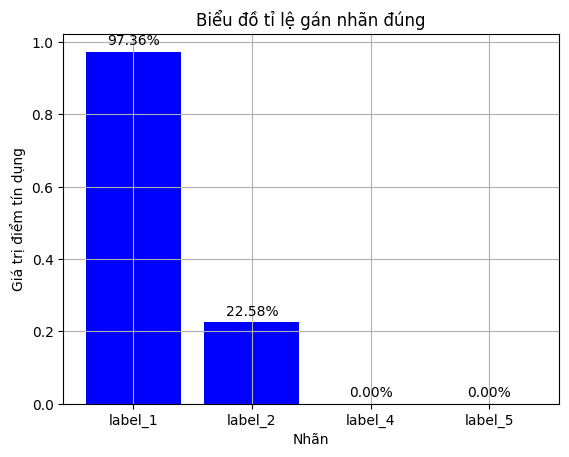

In [ ]:
import matplotlib.pyplot as plt

label_name = ['label_1', 'label_2', 'label_4', 'label_5']
accuracy_list = valuate(solutions[0])
# Tạo danh sách chỉ số từ 1 đến độ dài của mảng
indices = list(range(1, len(accuracy_list) + 1))

# Vẽ biểu đồ cột
plt.bar(indices, accuracy_list, color='blue')

plt.title('Biểu đồ tỉ lệ gán nhãn đúng')
plt.xlabel('Nhãn')
plt.ylabel('Giá trị điểm tín dụng')

# Hiển thị giá trị trực tiếp trên đỉnh của mỗi cột với tên nhãn
for i, v in enumerate(accuracy_list):
    plt.text(i + 1, v + 0.01, f'\n{v*100:.2f}%', ha='center', va='bottom', color='black')

# Đặt nhãn trục x
plt.xticks(indices, label_name)

plt.grid(True)
plt.show()
